In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

import joblib

In [2]:
df = pd.read_csv("../../datasets/synthetic_heart_disease_dataset.csv")
df.head()

,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,48,Male,78,157,26.4,Never,NaN,Sedentary,Healthy,Medium,...,0,1,1,0,104,99,71,165,200,0
1,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,0,1,1,0,111,72,60,145,206,0
2,79,Female,88,152,32.3,Never,NaN,Moderate,Average,Medium,...,0,0,1,0,116,102,78,148,208,0
3,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,0,1,0,0,171,92,109,105,290,1
4,34,Female,65,191,18.5,Current,NaN,Sedentary,Healthy,Low,...,1,0,0,0,164,67,108,116,220,1


In [3]:
df.columns

Index(['Age', 'Gender', 'Weight', 'Height', 'BMI', 'Smoking', 'Alcohol_Intake',
       'Physical_Activity', 'Diet', 'Stress_Level', 'Hypertension', 'Diabetes',
       'Hyperlipidemia', 'Family_History', 'Previous_Heart_Attack',
       'Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'Blood_Sugar_Fasting',
       'Cholesterol_Total', 'Heart_Disease'],
      dtype='str')

In [20]:
df['Alcohol_Intake'] = df['Alcohol_Intake'].fillna('Unknown')

KeyError: 'Alcohol_Intake'

In [ ]:
categorical_cols = df.select_dtypes(exclude=['number']).columns

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
X = df.drop(["Heart_Disease", "Previous_Heart_Attack"], axis=1)
y = df["Heart_Disease"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # important for imbalanced datasets
)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'   # helps if target is imbalanced
)

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9587

ROC-AUC Score: 0.9705955034378201

Classification Report:

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5365
           1       1.00      0.91      0.95      4635

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000


Confusion Matrix:

[[5365    0]
 [ 413 4222]]


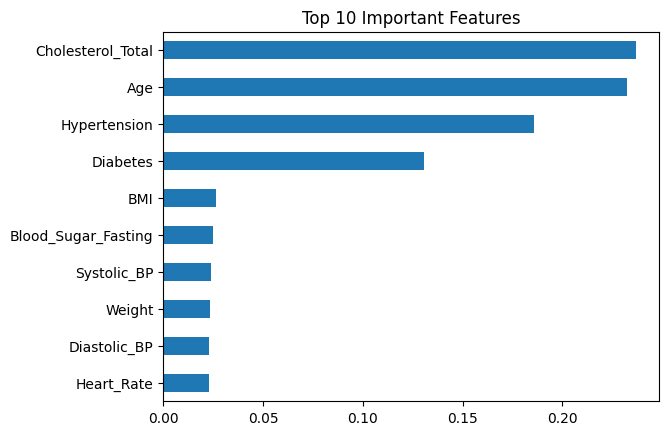

In [ ]:
import matplotlib.pyplot as plt

feature_importance = pd.Series(model.feature_importances_, index=X.columns)

feature_importance.sort_values(ascending=True).tail(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()